In [363]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings 
warnings.filterwarnings("ignore")

In [364]:
df = pd.read_csv("breast-cancer-wisconsin.data.csv")
df

,Id,Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           699 non-null    int64 
 1   Thickness    699 non-null    int64 
 2   Cell Size    699 non-null    int64 
 3   Cell Shape   699 non-null    int64 
 4   Adhesion     699 non-null    int64 
 5   Epithelial   699 non-null    int64 
 6   Nuclei       699 non-null    object
 7   Chromatin    699 non-null    int64 
 8   Nucleoli     699 non-null    int64 
 9   Mitoses      699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [366]:
#Convert object to float
df['Nuclei'] = pd.to_numeric(df['Nuclei'], errors='coerce')

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           699 non-null    int64  
 1   Thickness    699 non-null    int64  
 2   Cell Size    699 non-null    int64  
 3   Cell Shape   699 non-null    int64  
 4   Adhesion     699 non-null    int64  
 5   Epithelial   699 non-null    int64  
 6   Nuclei       683 non-null    float64
 7   Chromatin    699 non-null    int64  
 8   Nucleoli     699 non-null    int64  
 9   Mitoses      699 non-null    int64  
 10  Class        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [368]:
#Check the sum of null for each attribute
null_check = df.isnull().sum()
print(null_check)

Id              0
Thickness       0
Cell Size       0
Cell Shape      0
Adhesion        0
Epithelial      0
Nuclei         16
Chromatin       0
Nucleoli        0
Mitoses         0
Class           0
dtype: int64


In [369]:
#drop the null values
df = df.dropna()

<AxesSubplot:>

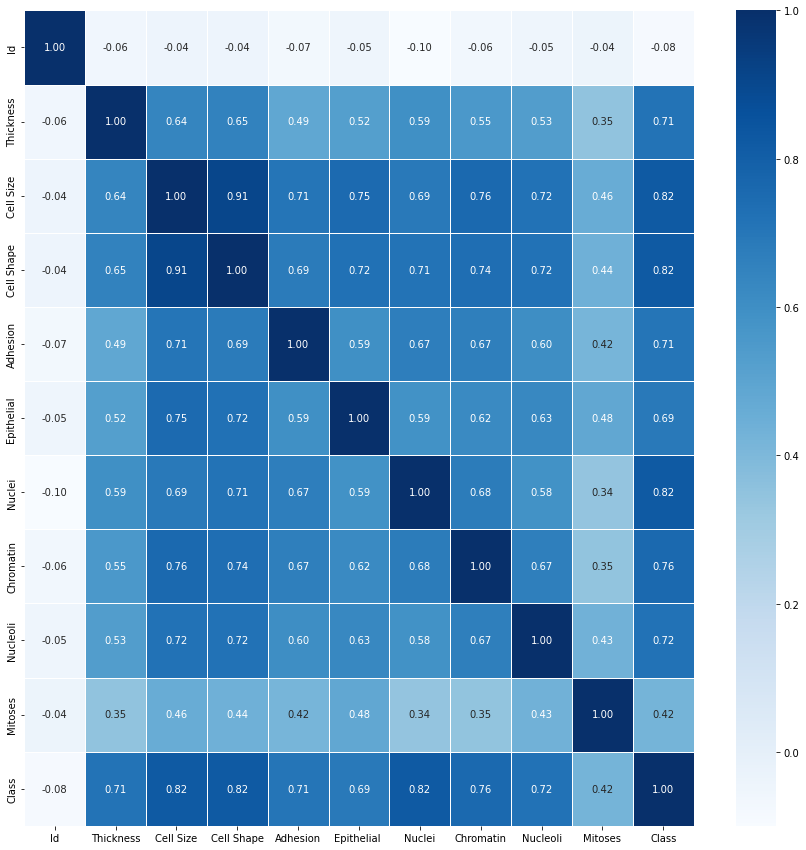

In [370]:
#Heatmap to indicate the association of feature
#Drop  low-relevance features.
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [371]:
df = df.drop(columns = ['Id', 'Mitoses'])
df

,Thickness,Cell Size,Cell Shape,Adhesion,Epithelial,Nuclei,Chromatin,Nucleoli,Class
0,5,1,1,1,2,1.0,3,1,2
1,5,4,4,5,7,10.0,3,2,2
2,3,1,1,1,2,2.0,3,1,2
3,6,8,8,1,3,4.0,3,7,2
4,4,1,1,3,2,1.0,3,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,2
695,2,1,1,1,2,1.0,1,1,2
696,5,10,10,3,7,3.0,8,10,4
697,4,8,6,4,3,4.0,10,6,4


In [372]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

In [373]:
x = df.drop(columns = ['Class'])
y = df[['Class']]

In [374]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)

In [375]:
#Put multiple scalers in the list
scaler_list = [StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler]

In [376]:
#Set it up model's hypherparameter and put it in the list
dt_p = {'criterion':['gini','entropy'], 'max_depth':[2,3,4]}
svm_p = {'C' : [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf']}
lr_p = {}
parameter = [dt_p,svm_p,lr_p]

In [377]:
#Put multiple models in the list
dt=DecisionTreeClassifier(criterion='entropy')
lr= LogisticRegression()
svm = SVC()
model_list = [dt,svm,lr]

In [378]:
#Put multiple k in the list
kfold_list=[3,5,10]

In [379]:
#Create an array to contain each result
estim=[]
scale=[]
kfold=[]
param=[]
score=[]

In [384]:
#Making one function with scaling, model, and k-fold
def all_applied_df(df):
    #Apply scaler in scaler_list
    for scaler in scaler_list:
        scaler().fit_transform(df)
        parameter = [dt_params,svm_params,lr_params]
        model_list = [dt,svm,lr]
        for model, parame in zip(model_list, parameter):
            for k in kfold_list:
                #Using GridSearchCV to find the right hyperparameter for the model
                grid_search = GridSearchCV(model, param_grid = parame, cv= k,verbose=3)
                grid_search.fit(x,y)
                estim.append(str(grid_search.best_estimator_))
                scale.append(str(scaler))
                param.append(str(grid_search.best_params_))
                kfold.append(k)
                score.append(grid_search.best_score_)
#Save the result in dataframe format
    applied_df = pd.DataFrame({'estimator':estim,'scaler':scale,'Parameter':param,'Kfold':kfold,'score':score})

In [385]:
#Call a function to check the result value
if __name__ == '__main__':
    print('Original df:')
    print(df)
    print()
    all_applied_df(df)

Original df:
     Thickness  Cell Size  Cell Shape  Adhesion  Epithelial   Nuclei  \
0            5          1           1         1            2     1.0   
1            5          4           4         5            7    10.0   
2            3          1           1         1            2     2.0   
3            6          8           8         1            3     4.0   
4            4          1           1         3            2     1.0   
..         ...        ...         ...       ...          ...     ...   
694          3          1           1         1            3     2.0   
695          2          1           1         1            2     1.0   
696          5         10          10         3            7     3.0   
697          4          8           6         4            3     4.0   
698          4          8           8         5            4     5.0   

     Chromatin  Nucleoli  Class  
0            3         1      2  
1            3         2      2  
2            3      